In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Splitting the dataset

In this section, the given dataset will be splitted into train and test set with the proportion of (70-30). All the data analysis and training process, including, data pre-processing, baseline model training, and hyper-parameter tuning, will be performed on the train set. The test set is used for the final evaluation. By doing this, data leakage and bias issue can be avoided. 

In [2]:
# Load the data set
dataset_path = './data/data_labels_mainData.csv'
data = pd.read_csv(dataset_path)

In [3]:
print(f"The shape of the dataset is: {data.shape}")

The shape of the dataset is: (9896, 6)


The dataset has **9896** records.

In [4]:
def plot_categorical_distribution(data):
    # Prepare data
    cell_type_counts = data[['cellType', 'cellTypeName']].value_counts().reset_index()
    cell_type_counts.columns = ['cellType', 'cellTypeName', 'Count']
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    # Plot 1: Cancerous vs Non-Cancerous
    sns.countplot(x='isCancerous', data=data, ax=axes[0])
    axes[0].set_title('Cancerous vs Non-Cancerous')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Non-Cancerous', 'Cancerous'])
    
    # Plot 2: Cell Type Distribution
    sns.barplot(data=cell_type_counts, x="cellTypeName", y="Count", ax=axes[1])
    axes[1].set_title('Cell Type Distribution')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

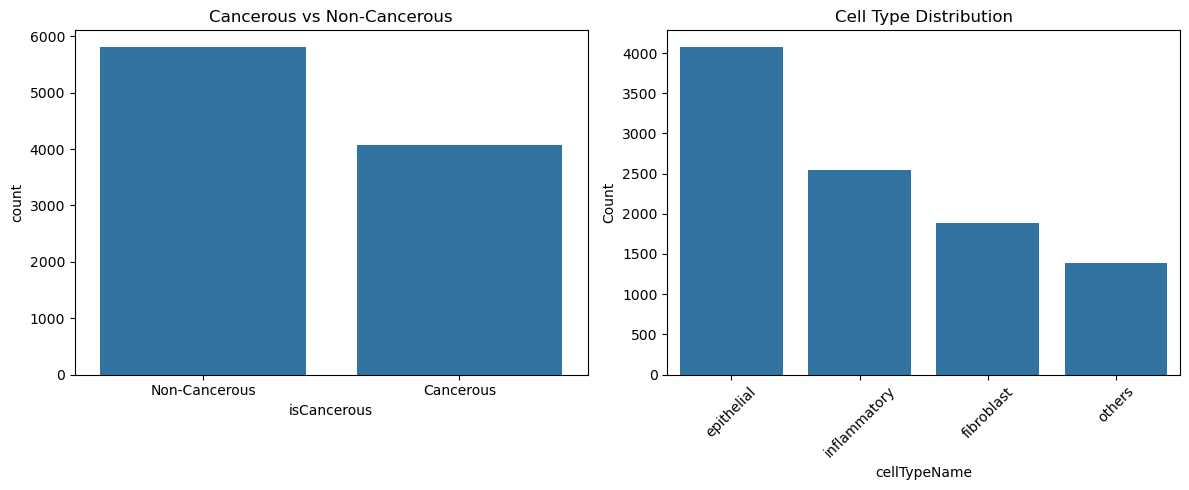

In [5]:
plot_categorical_distribution(data)

The generated graphs depict the the distribution of the two categorical variables: **isCanerous** and **cellType**. From the graph, the distribution is not distributed evenly. Therefore, when splitting the data to train and test sets, both sets should have the classes to train or test. Also, the miniroty should have enough data to train (**>20 samples**). **TODO: ADD REFERENCE HERE**

In [6]:
# TODO: Check here if I should generate based on the patient ID or not?
combined_target =  data['cellType'].astype(str) + '_' + data['isCancerous'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    data, combined_target, 
    test_size=0.25, 
    random_state=0, 
    stratify=combined_target
)

In [7]:
X_test.shape

(2474, 6)

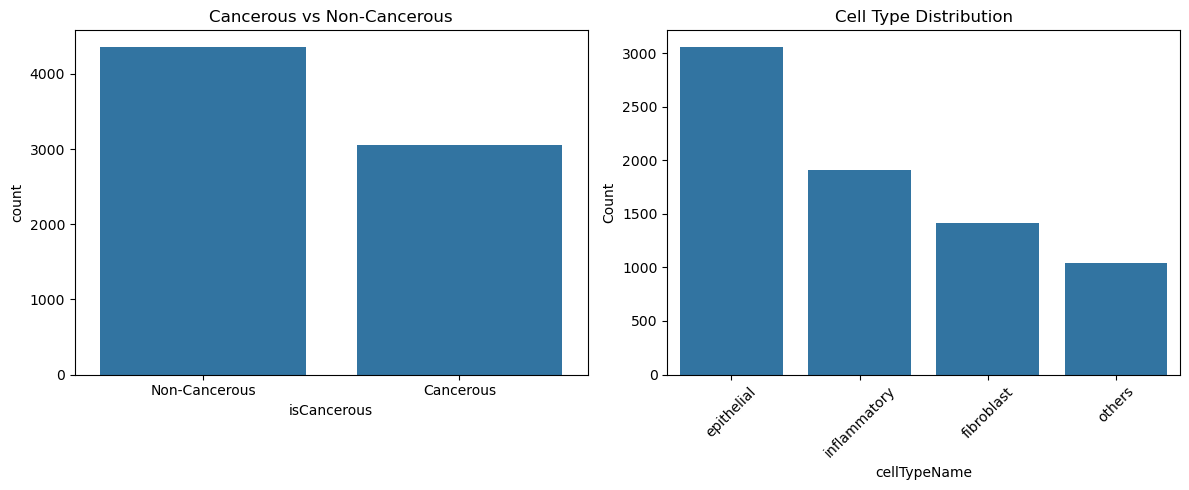

In [8]:
plot_categorical_distribution(X_train)

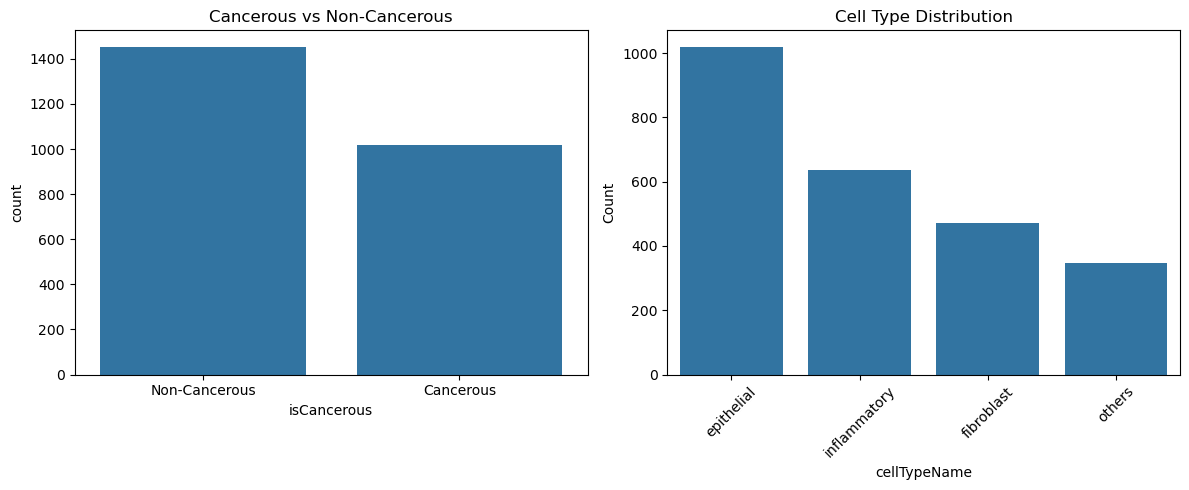

In [9]:
plot_categorical_distribution(X_test)

From the generated figures, both train and test set contains enough data to train and test.

In [11]:
# export to csv
X_train.to_csv('./data/train.csv', index=False)
X_test.to_csv('./data/test.csv', index=False)